number of classes:  4  sigma for data scatter: 1.0
generating training data
400 data points generated. Seed is random.


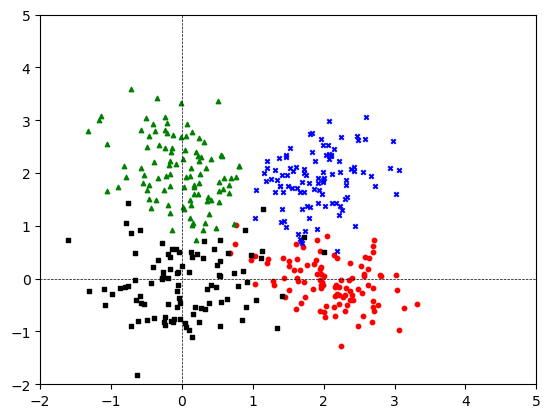

generating test data
100 data points generated. Seed is random.
training softmax classifier...
testing softmax classifier...
accuracy of softmax loss:  93.0 %


In [1]:
'''
HW2 problem
'''

import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special as sp
import time
from scipy.optimize import minimize

import data_generator as dg

# you can define/use whatever functions to implememt
# feat_dim : dim of input data (우리 과제에서는 2)
# shape(x) = (n_test, 2)
# shape(y) = (n_test,)
# shpae(W 행렬) = (num_class, 2)
# Wb : 마지막 num_class개는 bias 값

########################################
# cross entropy loss
########################################
def cross_entropy_softmax_loss(Wb, x, y, num_class, n, feat_dim):
    # implement your function here
    # return cross entropy loss

    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:].squeeze()
    W = np.reshape(Wb[:-num_class], (num_class, feat_dim))

    s = x@W.T + b
    # score has shape (n_test, num_class)

    # 예측된 확률 계산 (소프트맥스 함수 사용)
    exp_s = np.exp(s)
    softmax_prob = exp_s / np.sum(exp_s, axis=1, keepdims=True)

    loss_sum = 0
    for i in range(0, n):
        loss_sum += (-1) * np.log(softmax_prob[i][y[i]])
    
    loss = loss_sum / n
    
    return loss

# now lets test the model for linear models, that is, SVM and softmax
def linear_classifier_test(Wb, x, y, num_class):
    n_test = x.shape[0]
    feat_dim = x.shape[1]
    
    Wb = np.reshape(Wb, (-1, 1))
    # np.squeeze()는 크기가 1인 axis를 삭제
    b = Wb[-num_class:].squeeze()
    W = np.reshape(Wb[:-num_class], (num_class, feat_dim))
    accuracy = 0

    # W has shape (num_class, feat_dim), b has shape (num_class,)

    # numpy array에서 기본은 행 벡터
    # score
    s = x@W.T + b
    # score has shape (n_test, num_class) ;n_test : input data 개수
    
    # get argmax over class dim
    # 분류해야하는 class의 종류가 4가지 이면 0, 1, 2, 3 중 하나의 값을 가짐. size는 n_text임
    res = np.argmax(s, axis = 1)

    # get accuracy
    accuracy = (res == y).astype('uint8').sum()/n_test
    
    return accuracy


# number of classes: this can be either 3 or 4
num_class = 4

# sigma controls the degree of data scattering. Larger sigma gives larger scatter
# default is 1.0. Accuracy becomes lower with larger sigma
sigma = 1.0

print('number of classes: ',num_class,' sigma for data scatter:',sigma)
if num_class == 4:
    n_train = 400
    n_test = 100
    feat_dim = 2
else:  # then 3
    n_train = 300
    n_test = 60
    feat_dim = 2

# x_train, x_test의 shape = (num of data, 2)
# y_train, y_test의 shape = (num of data, )
# generate train dataset
print('generating training data')
x_train, y_train = dg.generate(number=n_train, seed=None, plot=True, num_class=num_class, sigma=sigma)

# generate test dataset
print('generating test data')
x_test, y_test = dg.generate(number=n_test, seed=None, plot=False, num_class=num_class, sigma=sigma)

# start training softmax classifier
print('training softmax classifier...')
w0 = np.random.normal(0, 1, (2 * num_class + num_class))
result = minimize(cross_entropy_softmax_loss, w0, args=(x_train, y_train, num_class, n_train, feat_dim))

print('testing softmax classifier...')

Wb = result.x
print('accuracy of softmax loss: ', linear_classifier_test(Wb, x_test, y_test, num_class)*100,'%')